In [1]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.collections import LineCollection

Enabling cache for storing data locally so that when the session is loaded next time, it loads the data from the cache.

In [2]:
ff1.Cache.enable_cache('C:\\Users\\mailn\\Downloads\\cache')

Enable plotting settings

In [3]:
ff1.plotting.setup_mpl()

In [51]:
session = ff1.get_session(2022, 'Zandvoort', 'Q')

session     WARNING 	Request for URL https://raw.githubusercontent.com/theOehrly/f1schedule/master/schedule_2022.json failed; using cached response
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    httplib_response = self._make_request(
  File "C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 1347, in getresponse
    response.begin()
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 307, in begin
    version, status, reason = self._read_status()
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 268, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), 

no data downloaded yet

In [5]:
session

In [6]:
session.load()

core           INFO 	Loading data for Dutch Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '55', '44', '11', '63', '4', '47', '22', '18', '10', '31', '14', '24', '23', '77', '3', '20', '5', '6']


In [16]:
pd.set_option('display.max_columns', 40)

In [17]:
laps_ver = session.laps.pick_driver('VER')

In [18]:
laps_ver

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 00:21:09.642000,1,NaT,1,0 days 00:19:46.866000,NaT,NaT,0 days 00:00:30.588000,0 days 00:00:22.747000,NaT,0 days 00:20:46.915000,0 days 00:21:09.679000,237.0,275.0,316.0,NaN,False,SOFT,1.0,True,1,0 days 00:19:46.866000,Red Bull Racing,VER,1,False,2022-09-03 13:04:46.876
1,0 days 00:22:20.959000,1,0 days 00:01:11.317000,2,NaT,NaT,0 days 00:00:24.455000,0 days 00:00:24.776000,0 days 00:00:22.086000,0 days 00:21:34.097000,0 days 00:21:58.873000,0 days 00:22:20.959000,287.0,284.0,313.0,325.0,False,SOFT,2.0,True,1,0 days 00:21:09.642000,Red Bull Racing,VER,1,True,2022-09-03 13:06:09.652
2,0 days 00:24:07.220000,1,0 days 00:01:46.261000,3,NaT,0 days 00:24:03.490000,0 days 00:00:34.813000,0 days 00:00:37.411000,0 days 00:00:34.037000,0 days 00:22:55.772000,0 days 00:23:33.183000,0 days 00:24:07.220000,193.0,232.0,NaN,242.0,False,SOFT,3.0,True,1,0 days 00:22:20.959000,Red Bull Racing,VER,1,False,2022-09-03 13:07:20.969
3,0 days 00:48:49.924000,1,NaT,4,0 days 00:47:27.401000,NaT,NaT,0 days 00:00:29.760000,0 days 00:00:22.891000,NaT,0 days 00:48:27.084000,0 days 00:48:49.997000,275.0,268.0,318.0,NaN,False,SOFT,4.0,False,2,0 days 00:47:27.401000,Red Bull Racing,VER,1,False,2022-09-03 13:32:27.411
4,0 days 00:50:00.851000,1,0 days 00:01:10.927000,5,NaT,NaT,0 days 00:00:24.529000,0 days 00:00:24.644000,0 days 00:00:21.754000,0 days 00:49:14.453000,0 days 00:49:39.097000,0 days 00:50:00.851000,283.0,285.0,317.0,324.0,False,SOFT,5.0,False,2,0 days 00:48:49.924000,Red Bull Racing,VER,1,True,2022-09-03 13:33:49.934
5,0 days 00:51:29.305000,1,0 days 00:01:28.454000,6,NaT,0 days 00:51:27.763000,0 days 00:00:28.352000,0 days 00:00:28.777000,0 days 00:00:31.325000,0 days 00:50:29.203000,0 days 00:50:57.980000,0 days 00:51:29.305000,252.0,237.0,NaN,255.0,False,SOFT,6.0,False,2,0 days 00:50:00.851000,Red Bull Racing,VER,1,False,2022-09-03 13:35:00.861
6,0 days 01:10:51.895000,1,NaT,7,0 days 01:09:30.620000,NaT,NaT,0 days 00:00:29.303000,0 days 00:00:22.744000,NaT,0 days 01:10:29.158000,0 days 01:10:52.019000,275.0,265.0,318.0,NaN,False,SOFT,1.0,True,3,0 days 00:51:29.305000,Red Bull Racing,VER,1,False,2022-09-03 13:36:29.315
7,0 days 01:12:02.410000,1,0 days 00:01:10.515000,8,NaT,NaT,0 days 00:00:24.235000,0 days 00:00:24.645000,0 days 00:00:21.635000,0 days 01:11:16.130000,0 days 01:11:40.775000,0 days 01:12:02.410000,285.0,285.0,318.0,325.0,False,SOFT,2.0,True,3,0 days 01:10:51.895000,Red Bull Racing,VER,1,True,2022-09-03 13:55:51.905
8,0 days 01:13:28.665000,1,0 days 00:01:26.255000,9,NaT,0 days 01:13:27.120000,0 days 00:00:28.136000,0 days 00:00:29.161000,0 days 00:00:28.958000,0 days 01:12:30.546000,0 days 01:12:59.707000,0 days 01:13:28.665000,255.0,241.0,NaN,255.0,False,SOFT,3.0,True,3,0 days 01:12:02.410000,Red Bull Racing,VER,1,False,2022-09-03 13:57:02.420
9,0 days 01:20:01.413000,1,NaT,10,0 days 01:18:18.179000,NaT,NaT,0 days 00:00:32.569000,0 days 00:00:23.710000,NaT,0 days 01:19:37.725000,0 days 01:20:01.577000,261.0,266.0,320.0,NaN,False,SOFT,1.0,True,4,0 days 01:13:28.665000,Red Bull Racing,VER,2,False,2022-09-03 13:58:28.675


In [19]:
laps_ver.pick_fastest()

Time                      0 days 01:21:11.755000
DriverNumber                                   1
LapTime                   0 days 00:01:10.342000
LapNumber                                     11
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:24.229000
Sector2Time               0 days 00:00:24.556000
Sector3Time               0 days 00:00:21.557000
Sector1SessionTime        0 days 01:20:25.642000
Sector2SessionTime        0 days 01:20:50.198000
Sector3SessionTime        0 days 01:21:11.755000
SpeedI1                                      285
SpeedI2                                      286
SpeedFL                                      321
SpeedST                                      327
IsPersonalBest                              True
Compound                                    SOFT
TyreLife                                       2
FreshTyre                                   True
Stint               

Get the telemetry data for the fastest lap of Verstappen

In [21]:
df1 = laps_ver.pick_fastest().get_telemetry()

In [23]:
df1

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2022-09-03 14:05:01.423,0 days 01:20:01.413000,,390.161667,0 days 00:00:00,11326,321,8,100,False,12,interpolation,0.086073,0.000020,OnTrack,510,3784,537
3,2022-09-03 14:05:01.448,0 days 01:20:01.438000,,390.161667,0 days 00:00:00.025000,11344,321,8,100,False,12,pos,2.324993,0.000550,OnTrack,521,3811,537
4,2022-09-03 14:05:01.485,0 days 01:20:01.475000,,390.161667,0 days 00:00:00.062000,11379,322,8,100,False,12,car,5.639444,0.001334,OnTrack,538,3853,536
5,2022-09-03 14:05:01.708,0 days 01:20:01.698000,,390.161667,0 days 00:00:00.285000,11396,322,8,100,False,12,pos,25.639776,0.006067,OnTrack,654,4134,537
6,2022-09-03 14:05:01.765,0 days 01:20:01.755000,47,390.161667,0 days 00:00:00.342000,11414,323,8,100,False,12,car,30.761667,0.007279,OnTrack,674,4183,537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,2022-09-03 14:06:11.246,0 days 01:21:11.236000,16,926.560278,0 days 00:01:09.823000,11350,320,8,100,False,12,car,4165.487500,0.985606,OnTrack,352,3386,536
512,2022-09-03 14:06:11.388,0 days 01:21:11.378000,16,921.421389,0 days 00:01:09.965000,11355,320,8,100,False,12,pos,4178.143633,0.988601,OnTrack,404,3519,537
513,2022-09-03 14:06:11.446,0 days 01:21:11.436000,16,916.282500,0 days 00:01:10.023000,11360,321,8,100,False,12,car,4183.320833,0.989826,OnTrack,422,3567,537
514,2022-09-03 14:06:11.686,0 days 01:21:11.676000,16,904.415833,0 days 00:01:10.263000,11385,322,8,100,False,12,car,4204.787500,0.994905,OnTrack,489,3733,537


In [139]:
df1['TimeFrame']=pd.to_numeric(df1['Time'])/1000000000
df1.to_csv('vers_tel.csv')

In [24]:
import plotly.express as px

In [126]:
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [136]:
df2=df1.loc[:,['Time', 'Speed', 'RPM', 'nGear', 'X', 'Y']].reset_index()
df2['TimeFrame']=pd.to_numeric(df2['Time'])/1000000000
fig = px.scatter(df2, x='X', y='Y', hover_data = ['Speed','nGear'], animation_frame='TimeFrame', range_x=[-1100, 9000], range_y=[-1700, 7000], template='simple_white')
fig.update_xaxes(showticklabels=False, title_text="")
fig.update_yaxes(showticklabels=False, title_text="")
fig.show()

In [149]:
#fig1 = px.line(df2, x='X', y='Y', template='simple_white', range_x=[-1500, 10000], range_y=[-2000, 8000])
#fig.update_xaxes(showticklabels=False, title_text="")
#fig.update_yaxes(showticklabels=False, title_text="")
#fig.show()
px.line(df2, x='X', y='Y', template='simple_white', range_x=[-1700, 12000], range_y=[-2200, 7000])

Driver Comparisons

In [23]:
driver1, driver2 = 'VET', 'NOR'

In [24]:
laps_driver1 = session.laps.pick_driver(driver1)
laps_driver2 = session.laps.pick_driver(driver2)

In [26]:
fastest_driver1 = laps_driver1.pick_fastest()
fastest_driver2 = laps_driver2.pick_fastest()

In [27]:
tel_driver1 = fastest_driver1.get_telemetry()
tel_driver2 = fastest_driver2.get_telemetry()

Delta time

In [28]:
delta_time, ref_tel, compare_tel = ff1.utils.delta_time(fastest_driver1, fastest_driver2)

Identify team color

In [29]:
team_driver1 = laps_driver1['Team'].iloc[0]

In [30]:
team_driver1

'Aston Martin'

In [31]:
team_driver2 = laps_driver2['Team'].iloc[0]

In [32]:
team_driver2

'McLaren'

In [33]:
color1 = ff1.plotting.team_color(team_driver1)
color2 = ff1.plotting.team_color(team_driver2)

In [34]:
color1

'#006f62'

Telemetry plot

In [36]:
plt.rcParams['figure.figsize']=[20,15]

There are 7 subplots

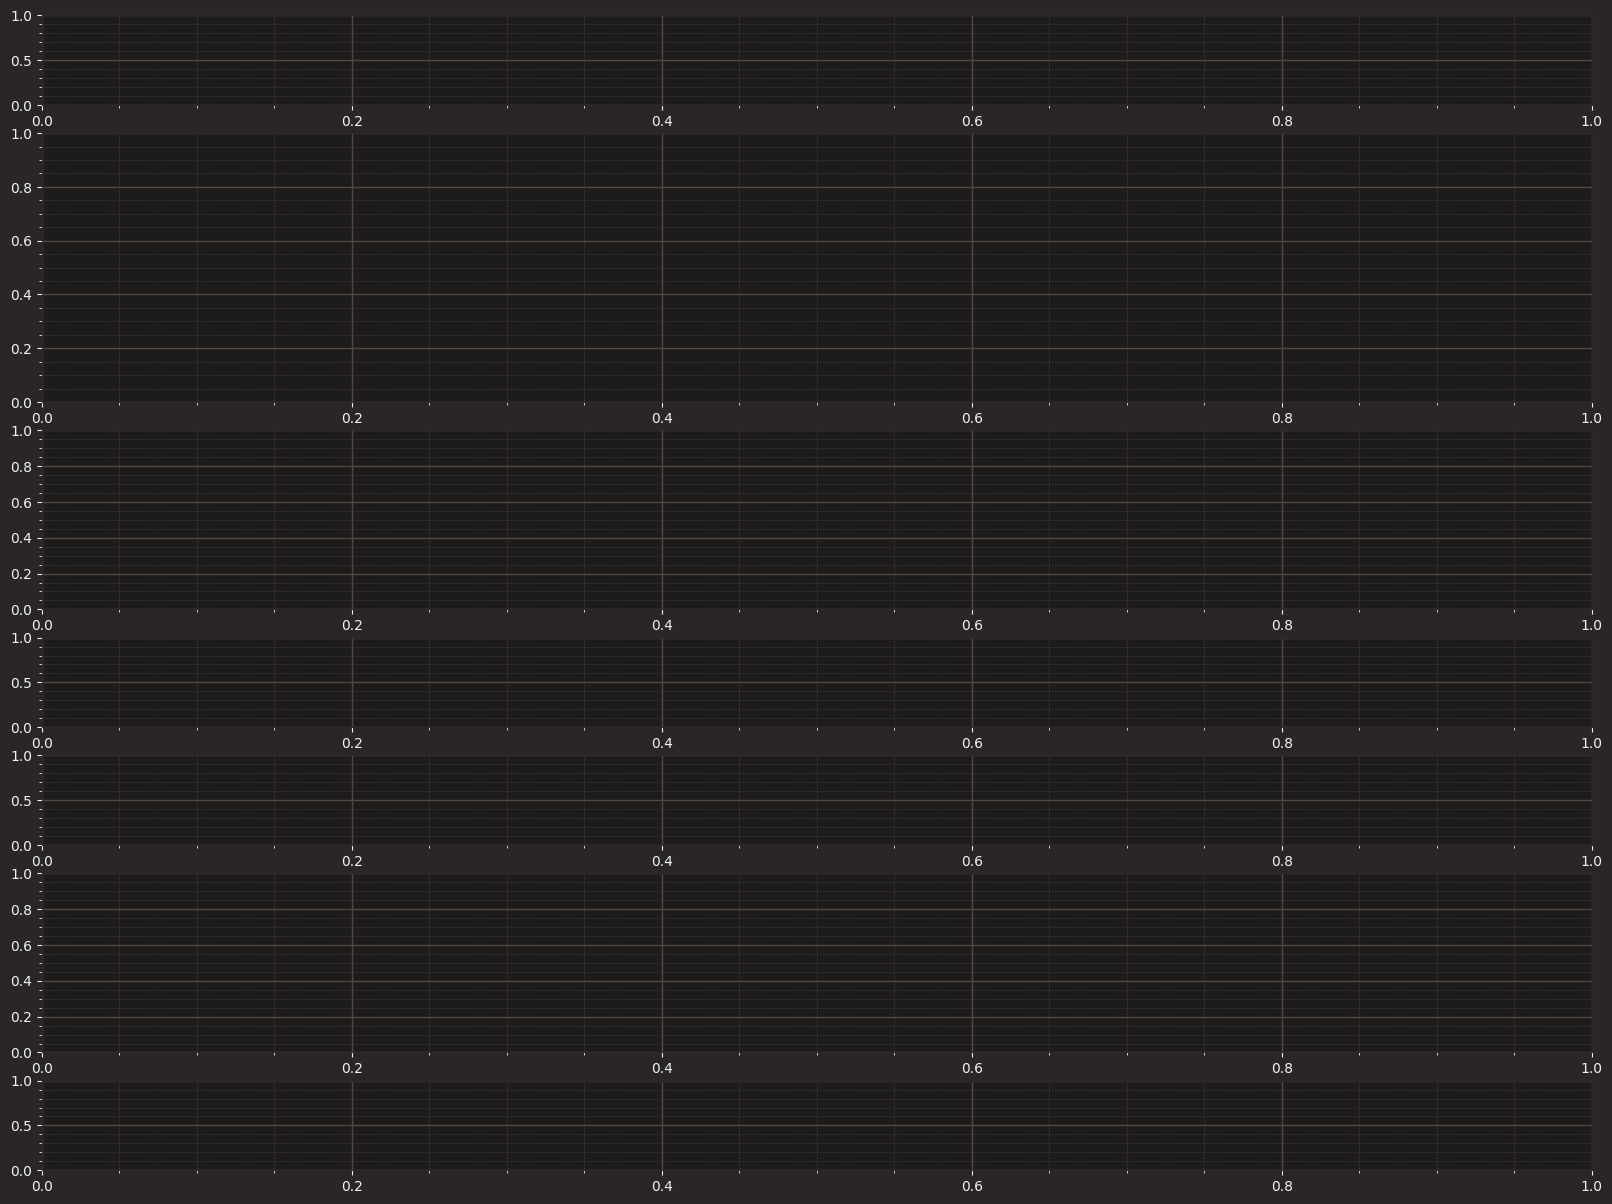

In [37]:
fig, ax = plt.subplots(7, gridspec_kw={'height_ratios': [1, 3, 2, 1, 1, 2, 1]})

ValueError: 'VET' is not a valid value for color

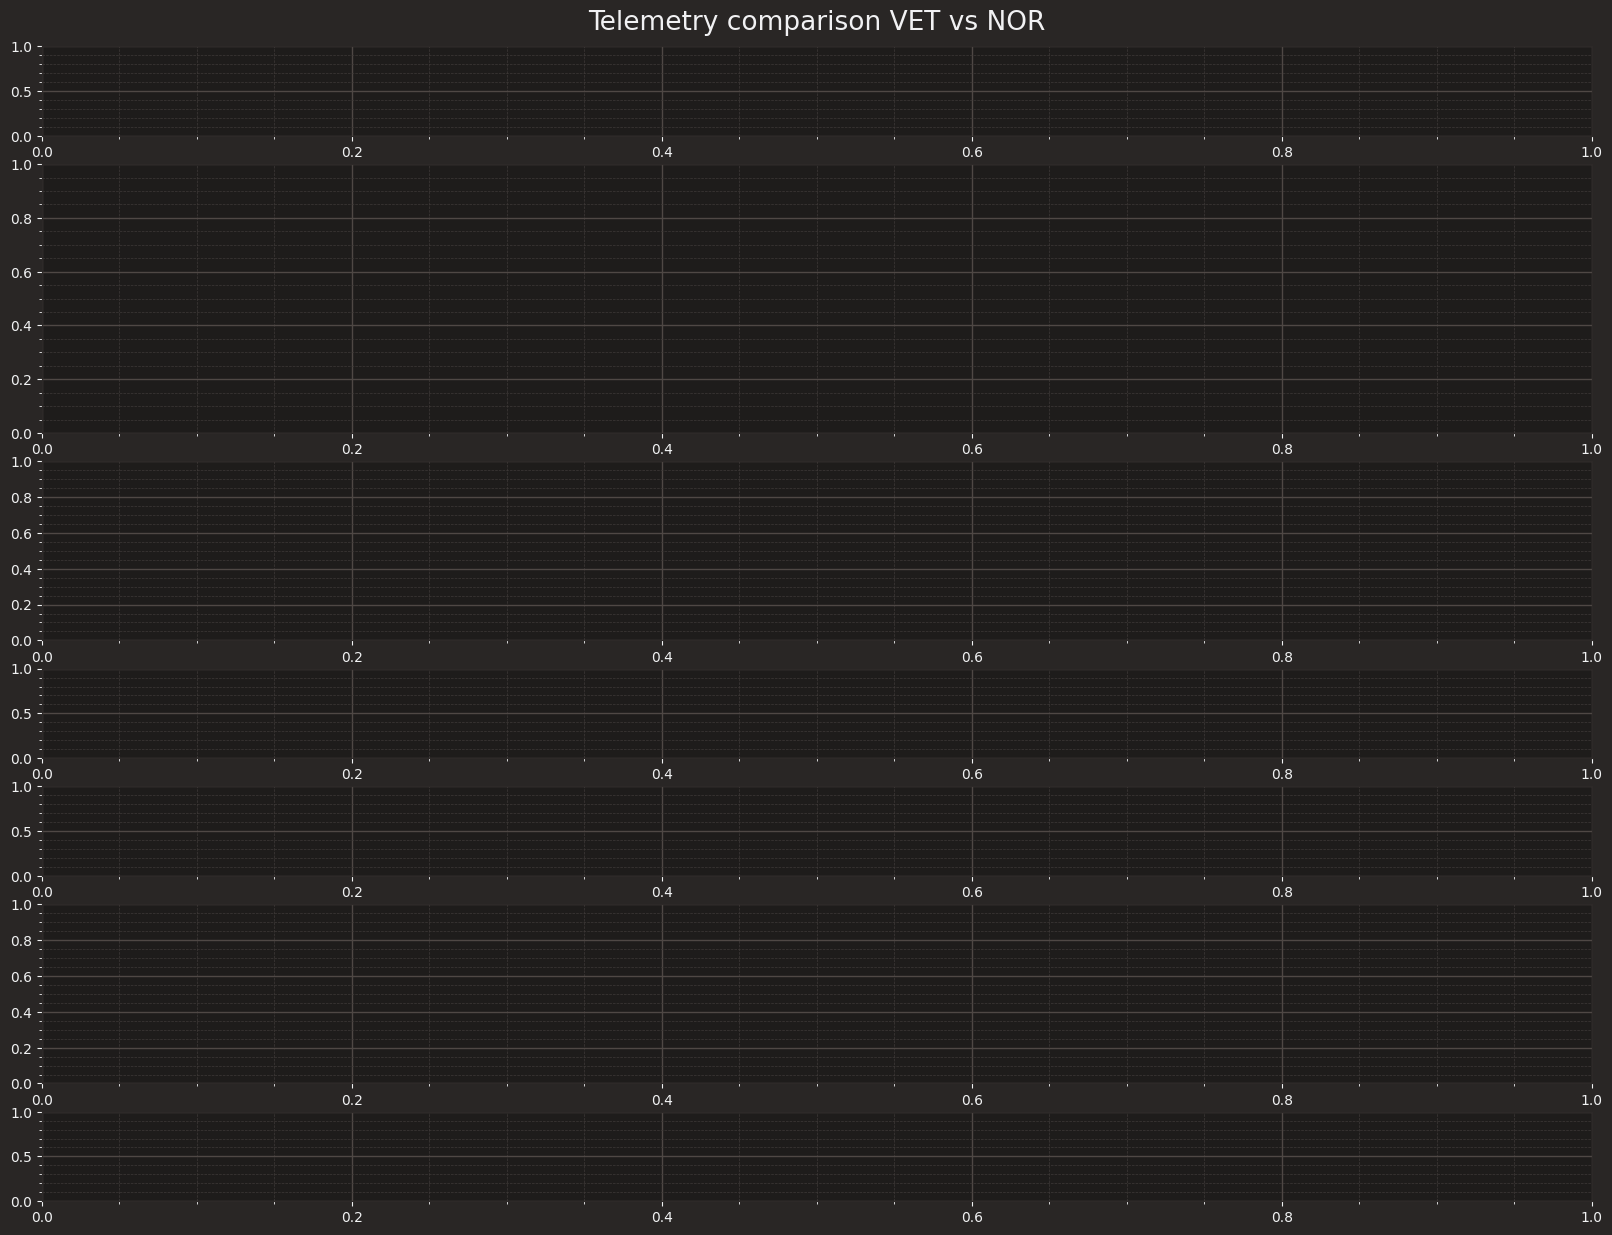

In [40]:
fig, ax = plt.subplots(7, gridspec_kw={'height_ratios': [1, 3, 2, 1, 1, 2, 1]})
ax[0].title.set_text(f"Telemetry comparison {driver1} vs {driver2}")
ax[0].plot(ref_tel['Distance'], delta_time, color=driver1)
ax[0].axhline(0)
ax[0].set(ylabel=f"Gap to {driver2}")

ax[1].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=driver_1, color=color_1)
ax[1].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=driver_2, color=color_2)
ax[1].set(ylabel="Speed")
ax[1].legend(loc="lower right")

# Subplot 3: Throttle
ax[2].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Throttle'], label=driver_1, color=color_1)
ax[2].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Throttle'], label=driver_2, color=color_2)
ax[2].set(ylabel="Speed")

ax[3].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Brake'], label=driver_1, color=color_1)
ax[3].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Brake'], label=driver_2, color=color_2)
ax[3].set(ylabel="Speed”)

ax[4].plot(telemetry_driver_1['Distance'], telemetry_driver_1['nGear'], label=driver_1, color=color_1)
ax[4].plot(telemetry_driver_2['Distance'], telemetry_driver_2['nGear'], label=driver_2, color=color_2)
ax[4].set(ylabel="Gear")

# Subplot 6: RPM
ax[5].plot(telemetry_driver_1['Distance'], telemetry_driver_1['RPM'], label=driver_1, color=color_1)
ax[5].plot(telemetry_driver_2['Distance'], telemetry_driver_2['RPM'], label=driver_2, color=color_2)
ax[5].set(ylabel="RPM")

# Subplot 7: DRS
ax[6].plot(telemetry_driver_1['Distance'], telemetry_driver_1['DRS'], label=driver_1, color=color_1)
ax[6].plot(telemetry_driver_2['Distance'], telemetry_driver_2['DRS'], label=driver_2, color=color_2)
ax[6].set(ylabel="DRS")


Minisector comparison

In [43]:
# Merge the telemetry from both drivers into one dataframe
telemetry_driver1['Driver'] = driver1
telemetry_driver2['Driver'] = driver2

telemetry = pd.concat([telemetry_driver1, telemetry_driver2])

NameError: name 'telemetry_driver1' is not defined